In [5]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import json
from tqdm import tqdm
import random

In [7]:
philli_df = pd.read_csv('processed_datasets/philadelphia/ratings_matrix_philli.csv', index_col = 0)

In [8]:
philli_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
--2tyArRmSoyKx5r-FVG0A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--2vR0DIsmQ6WfcSzKWigw,NaN,NaN,NaN,NaN,NaN,NaN,3.1481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--4AjktZiHowEIBCMd4CZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--4_p6Z3tKadJcr9Non_Vw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--6GckBYtTa4hj8pT09oAg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
philli_df.shape

(199676, 5078)

**Note that the ratings are on a scale of 0-6**

## Reducing the number of Users to 10000

Taking the top 10000 users who have the most interactions in the dataset

In [12]:
user_interactions = philli_df.notnull().sum(axis=1)

user_interactions

user_id
--2tyArRmSoyKx5r-FVG0A    4
--2vR0DIsmQ6WfcSzKWigw    8
--4AjktZiHowEIBCMd4CZA    9
--4_p6Z3tKadJcr9Non_Vw    1
--6GckBYtTa4hj8pT09oAg    1
                         ..
zzvCl_egPyWpxO7EvWc2IA    2
zzvLsOhm7gBMQDygMBDrHg    1
zzwYLnmIvj8C7wJmRjtkRA    2
zzx7J3zheFF3zf5YYfDAMg    1
zzzMBVS73g3ZJ7qL8JyhiA    1
Length: 199676, dtype: int64

In [13]:
# Select the top 10000 users with the most interactions
top_users = user_interactions.nlargest(10000)

In [14]:
top_users

user_id
ET8n-r7glWYqZhuR6GcdNw    558
bJ5FtCtZX3ZZacz2_2PJjA    485
_BcWyKQL16ndpBdggh2kNA    444
0DB3Irpf_ETVXu_Ou9vPow    397
kauJmG3ZiA-m5u0nPrjb4g    383
                         ... 
vlalBMmMXSk3Kpc_c6Q7TA      9
vmPkcipge9ICnIGwUuCAFg      9
vo2GzuR6kOFL8wGEpJYS3g      9
voCrdAuPEYHWEi7xdA915w      9
vq1CWOvn_Lrzk1divfsbzQ      9
Length: 10000, dtype: int64

In [15]:
ratings_df_philli = philli_df.loc[top_users.index]

print(ratings_df_philli.shape)

(10000, 5078)


In [16]:
ratings_df_philli

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
ET8n-r7glWYqZhuR6GcdNw,NaN,NaN,5.99155,4.91565,NaN,NaN,NaN,NaN,4.98275,NaN,...,NaN,NaN,4.9815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bJ5FtCtZX3ZZacz2_2PJjA,NaN,NaN,NaN,NaN,NaN,NaN,3.9874,NaN,4.98710,NaN,...,NaN,NaN,NaN,NaN,4.9851,4.9927,NaN,NaN,NaN,4.9545
_BcWyKQL16ndpBdggh2kNA,NaN,4.7351,NaN,NaN,NaN,NaN,NaN,NaN,3.95590,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9674,NaN,NaN
0DB3Irpf_ETVXu_Ou9vPow,NaN,NaN,5.98830,5.90810,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.9521,NaN,4.8543,NaN,NaN,NaN,NaN,NaN
kauJmG3ZiA-m5u0nPrjb4g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.8706,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vlalBMmMXSk3Kpc_c6Q7TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vmPkcipge9ICnIGwUuCAFg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo2GzuR6kOFL8wGEpJYS3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ratings_df_philli = ratings_df_philli.sample(frac=1)

In [18]:
ratings = ratings_df_philli.values

In [19]:
ratings.shape

(10000, 5078)

## Creating a New Test Set 

In [21]:
top_users_test = user_interactions.nlargest(11000)

In [22]:
top_users_test = top_users_test[10000:]

In [23]:
top_users_test

user_id
vsdUePI3xCl8NA_a6teuDQ    9
vsfeUsJtDdeUy6mt0dBgDA    9
vx6JR5We5Mex0Q3NhJVVqQ    9
vzH9g9o3nlFxb0AFVbK3Qg    9
w20MGTqtKtlbuvC5OHipTg    9
                         ..
U19IvPjT2uRGX3Kp-OhmWA    8
UD5SDcfBjQuEz5M7heNj5w    8
UDGMuiAT7b6Mwa8PaZrNig    8
UFA1LkOszw-g0jscVULEqg    8
UHy6hvtvpYHxIYv02PE3bA    8
Length: 1000, dtype: int64

In [24]:
top_users_test.shape

(1000,)

In [25]:
test_ratings_df = philli_df.loc[top_users_test.index]

print(test_ratings_df.shape)

(1000, 5078)


In [26]:
test_ratings_df

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
vsdUePI3xCl8NA_a6teuDQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vsfeUsJtDdeUy6mt0dBgDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vx6JR5We5Mex0Q3NhJVVqQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vzH9g9o3nlFxb0AFVbK3Qg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w20MGTqtKtlbuvC5OHipTg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U19IvPjT2uRGX3Kp-OhmWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UD5SDcfBjQuEz5M7heNj5w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UDGMuiAT7b6Mwa8PaZrNig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_ratings = test_ratings_df.values

In [28]:
test_ratings.shape

(1000, 5078)

In [48]:
total_training_df = pd.concat([ratings_df_philli, test_ratings_df], axis = 0)


,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
UyXqGEKod-veD6m6Hq0EDw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I6M-7LxI1By6jd8H_OneeQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rnH9fiCEiYrr84zr2joLHA,NaN,NaN,NaN,5.9712,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DN7mB9u36QlCourhzbRq7A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UkBI4VW3CwLvIgXaiiLdig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U19IvPjT2uRGX3Kp-OhmWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UD5SDcfBjQuEz5M7heNj5w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UDGMuiAT7b6Mwa8PaZrNig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
total_training_df.to_csv('processed_datasets/philadelphia/train_ratings_matrix_philli.csv')

## Baseline Estimate

In [40]:
def rmse_score(prediction_mat, test_mat):    
    return np.sqrt(np.nanmean((prediction_mat - test_mat)**2))

In [32]:
def baseline_estimate(train_mat):
    
    # Building the mean matrix
    overall_avg = np.nanmean(train_mat)
    print("The overall average of all the ratings is: ", overall_avg)
    u = np.full(train_mat.shape, overall_avg)
    
    # Building the bu matrix
    bu_vec = np.nanmean(train_mat, axis = 1).reshape(-1,1)
    bu_vec[np.isnan(bu_vec)] = 0
    bu_vec -= overall_avg
    bu = np.tile(bu_vec, (1,train_mat.shape[1]))
               
    # Building the bi matrix
    bi_vec = np.nanmean(train_mat, axis = 0).reshape(1,-1)
    bi_vec[np.isnan(bi_vec)] = 0
    bi_vec -= overall_avg
    bi = np.tile(bi_vec, (train_mat.shape[0],1))
    
    return u + bi + bu

In [33]:
baseline_pred = baseline_estimate(ratings)
baseline_pred.shape

The overall average of all the ratings is:  4.70165895101797


/var/folders/_g/fyn1m_tx7sbcpb8mtykvz6jw0000gn/T/ipykernel_5785/2976798051.py:15: RuntimeWarning: Mean of empty slice
  bi_vec = np.nanmean(train_mat, axis = 0).reshape(1,-1)


(10000, 5078)

#### Evaluating on the Training Set

In [34]:
rmse_baseline = rmse_score(baseline_pred, ratings)
print(f"RMSE of baseline estimation recommender is: ", rmse_baseline)

RMSE of baseline estimation recommender is:  1.0957492304458776


In [35]:
baseline_df = pd.DataFrame(baseline_pred, index=ratings_df_philli.index, columns=ratings_df_philli.columns)
baseline_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
3pdEpfdwA-ghzfIp4NJoqQ,6.565122,5.952230,5.781874,5.181808,3.971822,4.478489,5.063867,4.118705,5.328823,3.799462,...,2.922172,5.623021,5.976417,5.267417,5.197033,5.439573,4.693793,5.868572,5.923442,5.146849
JvUPonIfl51OeVVlKZ4Fmw,5.736229,5.123337,4.952981,4.352915,3.142929,3.649596,4.234974,3.289812,4.499930,2.970569,...,2.093279,4.794128,5.147524,4.438524,4.368140,4.610680,3.864900,5.039679,5.094549,4.317956
-zFn-szI6fDgZiCHg4C4zA,7.114830,6.501938,6.331582,5.731516,4.521530,5.028197,5.613575,4.668413,5.878531,4.349170,...,3.471880,6.172729,6.526125,5.817125,5.746741,5.989281,5.243501,6.418280,6.473150,5.696557
b9HV74ZB2neuy51hWstUGQ,6.300977,5.688084,5.517729,4.917662,3.707677,4.214343,4.799722,3.854560,5.064678,3.535317,...,2.658027,5.358876,5.712272,5.003272,4.932887,5.175428,4.429648,5.604427,5.659297,4.882704
w9b3RcwGfHP-hvGFso-ADg,6.247524,5.634632,5.464276,4.864210,3.654224,4.160891,4.746270,3.801108,5.011225,3.481864,...,2.604574,5.305423,5.658819,4.949819,4.879435,5.121976,4.376195,5.550974,5.605844,4.829251


In [36]:
baseline_df.to_csv('processed_datasets/philadelphia/Predictions/baseline_preds.csv')

#### Evaluating on the Test Set 

In [152]:
baseline_pred_test = baseline_estimate(test_ratings)
baseline_pred_test.shape

The overall average of all the ratings is:  4.62109769873616


/var/folders/_g/fyn1m_tx7sbcpb8mtykvz6jw0000gn/T/ipykernel_5785/2976798051.py:15: RuntimeWarning: Mean of empty slice
  bi_vec = np.nanmean(train_mat, axis = 0).reshape(1,-1)


(1000, 5078)

In [153]:
rmse_baseline_test = rmse_score(baseline_pred_test, test_ratings)
print(f"RMSE of baseline estimation recommender on Test Set is: ", rmse_baseline_test)

RMSE of baseline estimation recommender on Test Set is:  1.1053130982573478


## User-user Collaborative Filtering with Pearson Similarity

In [40]:
ratings.shape

(10000, 5078)

In [71]:
from scipy.stats import pearsonr
from tqdm import tqdm

def similarity_score(v1, v2):
    intersection_items = np.where((~np.isnan(v1)) & (~np.isnan(v2)))[0]

    #If there are 0 intersection items return similarity score 0
    if len(intersection_items) == 0 :
        return 0  

    v1_ = v1[intersection_items]
    v2_ = v2[intersection_items]
    mean_v1 = np.mean(v1_)
    mean_v2 = np.mean(v2_)
    centered_v1 = (v1_ - mean_v1).reshape(1,-1)
    centered_v2 = (v2_ - mean_v2).reshape(1,-1)
    numerator = np.dot(centered_v1 , centered_v2 .T)
    denominator = np.sqrt(np.sum(centered_v1**2) * np.sum(centered_v2**2))
    return np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)[0][0]


def pearson_similarity_matrix(data_matrix):
    similarity_matrix = np.zeros((data_matrix.shape[0],data_matrix.shape[0])) 
    for v in tqdm(range(data_matrix.shape[0])):
        v_ratings = data_matrix[v]
        for neighbor in range(v + 1, data_matrix.shape[0]):
            similarity = similarity_score(v_ratings, data_matrix[neighbor])
            similarity_matrix[v, neighbor] = similarity
            similarity_matrix[neighbor, v] = similarity
    
    np.fill_diagonal(similarity_matrix, -1.5)

    return similarity_matrix

def user_user_CF(matrix, similarity_matrix, N = 5):
    num_users, num_items = matrix.shape
    predicted_ratings = np.zeros_like(matrix)
    train_mat = matrix
    
    for user in tqdm(range(num_users), desc = 'Predicting Ratings of the Matrix'):
        similar_users = np.argsort(similarity_matrix[user])[::-1][:N]
        
        for item in range(num_items):
            num = 0 
            den = 0 
            
            for sim_user in similar_users:
                if not np.isnan(train_mat[sim_user, item]): 
                    rating_diff = train_mat[sim_user, item] - np.nanmean(train_mat[sim_user])
                    sim_score = similarity_matrix[user, sim_user]
                    num += sim_score * rating_diff
                    den += np.abs(sim_score)
            if den == 0:
                predicted_ratings[user, item] = np.nanmean(train_mat[user])
            else:
                predicted_ratings[user, item] = np.nanmean(train_mat[user]) + (num/den)
    
    return predicted_ratings

In [47]:
similarity_matrix = pearson_similarity_matrix(ratings)

Predicting Ratings of the Matrix: 100%|██████████| 10000/10000 [3:09:25<00:00,  1.14s/it] 


In [72]:
user_user_pred = user_user_CF(ratings, similarity_matrix)

Predicting Ratings of the Matrix: 100%|██████████| 10000/10000 [35:54<00:00,  4.64it/s]


In [73]:
user_user_pred

array([[5.29738095, 5.29738095, 5.29738095, ..., 5.29738095, 5.29738095,
        5.33320788],
       [4.46848784, 4.46848784, 3.55238026, ..., 4.46848784, 4.46848784,
        4.46848784],
       [5.84708889, 5.84708889, 5.84708889, ..., 5.84708889, 5.84708889,
        5.84708889],
       ...,
       [4.17465667, 4.17465667, 4.17465667, ..., 4.17465667, 4.17465667,
        4.17465667],
       [4.46951111, 4.46951111, 4.46951111, ..., 4.46951111, 4.46951111,
        4.46951111],
       [3.833385  , 3.833385  , 3.833385  , ..., 3.833385  , 3.833385  ,
        3.833385  ]])

In [74]:
user_user_pred.shape

(10000, 5078)

#### Evaluating on the Train Set 

In [75]:
rmse_user_user = rmse_score(user_user_pred, ratings)
print(f"RMSE of User-User Collaborative Filtering is: ", rmse_user_user)

RMSE of baseline estimation recommender is:  1.2125975849535249


In [76]:
user_user_df = pd.DataFrame(user_user_pred, index=ratings_df_philli.index, columns=ratings_df_philli.columns)
user_user_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
3pdEpfdwA-ghzfIp4NJoqQ,5.297381,5.297381,5.297381,5.297381,5.297381,5.297381,5.297381,5.297381,5.297381,5.297381,...,5.297381,5.297381,5.297381,5.657620,5.297381,5.297381,5.297381,5.297381,5.297381,5.333208
JvUPonIfl51OeVVlKZ4Fmw,4.468488,4.468488,3.552380,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488,...,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488,4.468488
-zFn-szI6fDgZiCHg4C4zA,5.847089,5.847089,5.847089,5.087156,5.847089,5.847089,5.847089,5.847089,5.847089,5.847089,...,5.847089,5.498188,5.847089,5.847089,5.847089,5.847089,5.847089,5.847089,5.847089,5.847089
b9HV74ZB2neuy51hWstUGQ,5.033236,5.033236,3.835539,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236,...,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236,5.033236
w9b3RcwGfHP-hvGFso-ADg,4.979783,4.979783,5.210158,4.979783,4.979783,4.979783,4.979783,4.979783,4.979783,4.979783,...,4.979783,3.236832,6.243232,4.979783,4.979783,4.979783,4.979783,4.979783,4.979783,4.979783


In [77]:
user_user_df.to_csv('processed_datasets/philadelphia/Predictions/user_user_preds.csv')

#### Evaluating on the Test Set

In [157]:
similarity_matrix_test = pearson_similarity_matrix(test_ratings)

100%|██████████| 1000/1000 [00:09<00:00, 109.21it/s]


In [158]:
user_user_pred_test = user_user_CF(test_ratings, similarity_matrix_test)

Predicting Ratings of the Matrix: 100%|██████████| 1000/1000 [02:11<00:00,  7.61it/s]


In [160]:
user_user_pred_test.shape

(1000, 5078)

In [161]:
rmse_user_user_test = rmse_score(user_user_pred_test, test_ratings)
print(f"RMSE of User-User Collaborative Filtering on Test Set is:", rmse_user_user_test)

RMSE of User-User Collaborative Filtering on Test Set is: 1.32505277341252


## Matrix Factorization 

In [79]:
ratings_mf_df = ratings_df_philli.fillna(0)

In [80]:
ratings_mf_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
3pdEpfdwA-ghzfIp4NJoqQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JvUPonIfl51OeVVlKZ4Fmw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0772,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-zFn-szI6fDgZiCHg4C4zA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b9HV74ZB2neuy51hWstUGQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w9b3RcwGfHP-hvGFso-ADg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
ratings_mf = ratings_mf_df.values

In [82]:
ratings_mf.shape

(10000, 5078)

In [163]:
test_ratings_mf_df = test_ratings_df.fillna(0)
test_ratings_mf_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
vsdUePI3xCl8NA_a6teuDQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vsfeUsJtDdeUy6mt0dBgDA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vx6JR5We5Mex0Q3NhJVVqQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vzH9g9o3nlFxb0AFVbK3Qg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w20MGTqtKtlbuvC5OHipTg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
test_ratings_mf = test_ratings_mf_df.values
test_ratings_mf.shape

(1000, 5078)

In [87]:
class MF:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  
        self.test_mat = test_mat

        self.latent = latent
        self.lr = lr 
        self.reg = reg

        self.num_user, self.num_movie = train_mat.shape

        self.sample_user, self.sample_movie = self.train_mat.nonzero() 
        self.num_sample = len(self.sample_user)

        self.train_indicator_mat = 1.0 * (train_mat > 0)
        self.test_indicator_mat = 1.0 * (test_mat > 0)

        self.P = np.random.random((self.num_user, self.latent))
        self.Q = np.random.random((self.num_movie, self.latent))
        
    def train(self, epoch=20, verbose=True):
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        
        idx = list(range(self.num_sample))
        for ep in range(epoch):
            random.shuffle(idx)
            epoch_loss = 0
            for i in idx:
                user = self.sample_user[i]
                movie = self.sample_movie[i]
                pred = np.dot(self.P[user], self.Q[movie].T)
                gt = self.train_mat[user,movie]
                err = pred - gt
                
                epoch_loss += err**2
                
                err_grad_P = 2 * err * self.Q[movie]
                reg_grad_P = 2 * self.reg * self.P[user]
                
                err_grad_Q = 2 * err * self.P[user]
                reg_grad_Q = 2 * self.reg * self.Q[movie]
                
                self.P[user] = self.P[user] - self.lr * (err_grad_P + reg_grad_P)
                self.Q[movie] = self.Q[movie] - self.lr * (err_grad_Q + reg_grad_Q)
            
            pred_mat = np.matmul(self.P, self.Q.T)
            test_mat_new = np.where(self.test_mat != 0, self.test_mat, np.nan)
            rmse = np.sqrt(np.nanmean((pred_mat - test_mat_new)**2))
            
            mean_epoch_loss = epoch_loss / self.num_sample
            epoch_loss_list.append(mean_epoch_loss)
            epoch_test_RMSE_list.append(rmse)         
            
            if verbose: 
                print("Epoch {}: Average Training Loss = {} || Test RMSE = {}".format(ep+1, mean_epoch_loss, rmse))
            
            """
            End of your code for this function
            """
        return epoch_loss_list, epoch_test_RMSE_list


    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat

In [88]:
mf = MF(ratings_mf, ratings_mf, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)

Epoch 1: Average Training Loss = 3.035068916325908 || Test RMSE = 1.2067895206635977
Epoch 2: Average Training Loss = 1.460104207238396 || Test RMSE = 1.1262873582190978
Epoch 3: Average Training Loss = 1.3446925360358677 || Test RMSE = 1.098808573672637
Epoch 4: Average Training Loss = 1.2928705435473296 || Test RMSE = 1.081795948247982
Epoch 5: Average Training Loss = 1.2585966204250223 || Test RMSE = 1.0680115708641547
Epoch 6: Average Training Loss = 1.2268130354187556 || Test RMSE = 1.0503610974386783
Epoch 7: Average Training Loss = 1.1938831084755328 || Test RMSE = 1.037443274530404
Epoch 8: Average Training Loss = 1.1636697916016367 || Test RMSE = 1.0228548995428524
Epoch 9: Average Training Loss = 1.1341068352290666 || Test RMSE = 1.0076256865507245
Epoch 10: Average Training Loss = 1.1063168116889444 || Test RMSE = 0.9964325225886752
Epoch 11: Average Training Loss = 1.0823013066492255 || Test RMSE = 0.9845559986512971
Epoch 12: Average Training Loss = 1.0591993617701303 || T

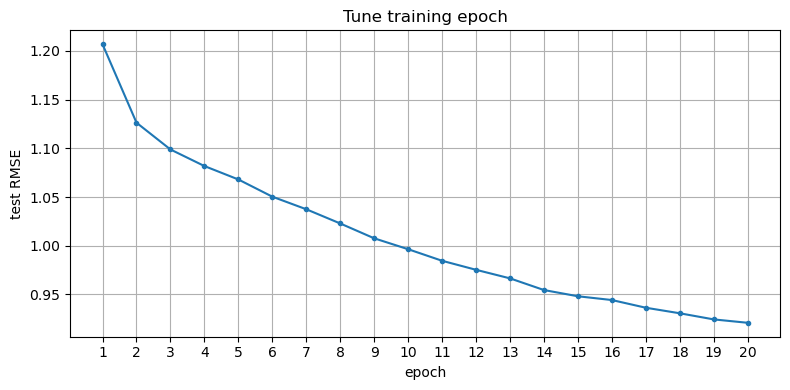

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.')
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.show()

In [90]:
mf = MF(ratings_mf, ratings_mf, latent=5, lr=0.001, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=100)

Epoch 1: Average Training Loss = 8.336517163414992 || Test RMSE = 2.28770841707135
Epoch 2: Average Training Loss = 4.18927341591157 || Test RMSE = 1.8325224819827535
Epoch 3: Average Training Loss = 2.9595505149102648 || Test RMSE = 1.6022879960768268
Epoch 4: Average Training Loss = 2.371212128002737 || Test RMSE = 1.4635335221694026
Epoch 5: Average Training Loss = 2.0348940456885662 || Test RMSE = 1.3725110110692862
Epoch 6: Average Training Loss = 1.8226268735929019 || Test RMSE = 1.3092974935270876
Epoch 7: Average Training Loss = 1.6794886668432771 || Test RMSE = 1.263592757262449
Epoch 8: Average Training Loss = 1.5779534890179188 || Test RMSE = 1.2294990586032535
Epoch 9: Average Training Loss = 1.503354096674863 || Test RMSE = 1.2032364511287479
Epoch 10: Average Training Loss = 1.4466160033818338 || Test RMSE = 1.1827111221467719
Epoch 11: Average Training Loss = 1.4023795280710942 || Test RMSE = 1.1662233776399373
Epoch 12: Average Training Loss = 1.36707534109959 || Test R

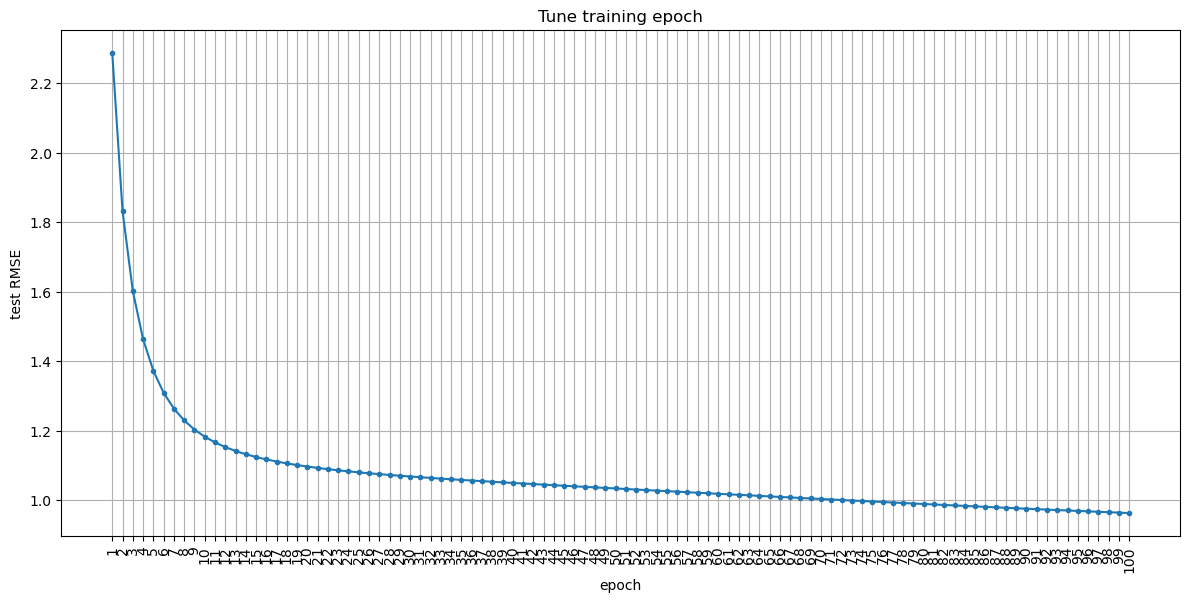

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.')
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [92]:
min_idx = np.argsort(epoch_test_RMSE_list)[0]
best_rmse = epoch_test_RMSE_list[min_idx]
print("We get the lowest RMSE in epoch {}. The RMSE value is: {}".format(min_idx+1, best_rmse))

We get the lowest RMSE in epoch 100. The RMSE value is: 0.9628355485954332


In [93]:
latents = [1,3,5,7,9]
best_rmse = [] 

for latent in latents: 
    mf = MF(ratings_mf, ratings_mf, latent=latent, lr=0.001, reg=0.001)
    epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=100, verbose = False)
    min_idx = np.argsort(epoch_test_RMSE_list)[0]
    best_rmse.append(epoch_test_RMSE_list[min_idx])

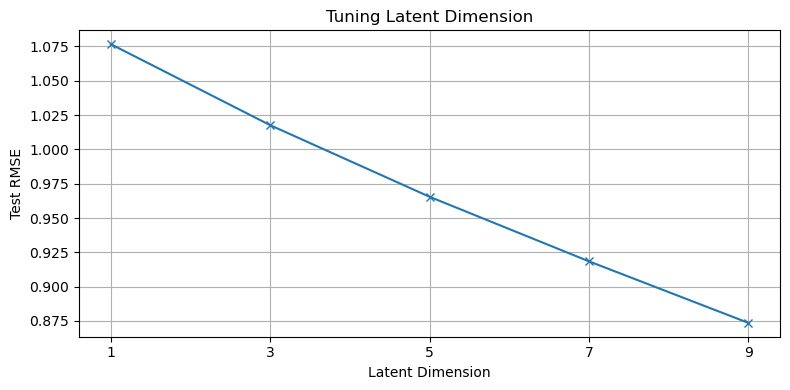

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(latents, best_rmse, marker='x')
ax.set_xticks(latents)
ax.set_ylabel('Test RMSE')
ax.set_xlabel('Latent Dimension')
ax.set_title('Tuning Latent Dimension')
ax.grid(True)
plt.tight_layout()
plt.show()

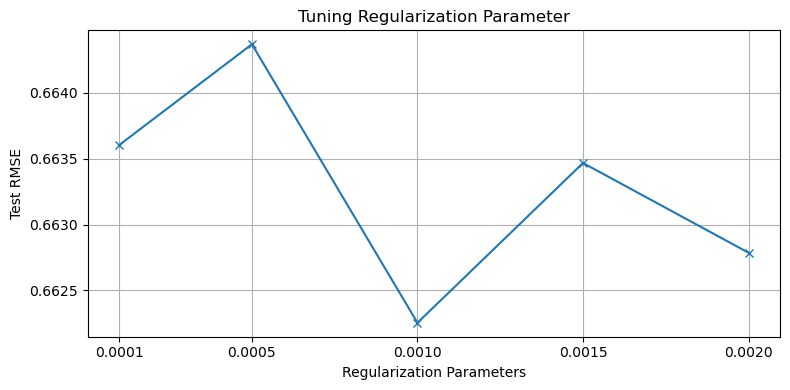

In [96]:
regs = [0.0001,0.0005,0.001,0.0015,0.002]
best_rmse = [] 

for reg in regs: 
    mf = MF(ratings_mf, ratings_mf, latent=9, lr=0.01, reg=reg)
    epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=100, verbose = False)
    min_idx = np.argsort(epoch_test_RMSE_list)[0]
    best_rmse.append(epoch_test_RMSE_list[min_idx])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(regs, best_rmse, marker='x')
ax.set_xticks(regs)
ax.set_ylabel('Test RMSE')
ax.set_xlabel('Regularization Parameters')
ax.set_title('Tuning Regularization Parameter')
ax.grid(True)
plt.tight_layout()
plt.show()

In [97]:
# Training with the best parameters
mf = MF(ratings_mf, ratings_mf, latent=9, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=200)

Epoch 1: Average Training Loss = 2.1417376413173232 || Test RMSE = 1.1454165743982634
Epoch 2: Average Training Loss = 1.3647665158767823 || Test RMSE = 1.0951220756051228
Epoch 3: Average Training Loss = 1.280839701656489 || Test RMSE = 1.0688817935549526
Epoch 4: Average Training Loss = 1.2280384560102724 || Test RMSE = 1.0454271273476647
Epoch 5: Average Training Loss = 1.1781509224257614 || Test RMSE = 1.0238634018678077
Epoch 6: Average Training Loss = 1.1310676606785288 || Test RMSE = 1.00029465335755
Epoch 7: Average Training Loss = 1.0826425444693313 || Test RMSE = 0.9743958167151686
Epoch 8: Average Training Loss = 1.0338277873027037 || Test RMSE = 0.950871089160804
Epoch 9: Average Training Loss = 0.9890383894771433 || Test RMSE = 0.9287068133347126
Epoch 10: Average Training Loss = 0.9472314143375082 || Test RMSE = 0.907767107929769
Epoch 11: Average Training Loss = 0.9110477675003475 || Test RMSE = 0.8885161895582251
Epoch 12: Average Training Loss = 0.8763227789910503 || T

### Evaluating on Training Set

In [98]:
MF_preds = mf.predict()

In [109]:
MF_preds

array([[6.6050991 , 6.20375809, 6.66257115, ..., 5.68445796, 6.14237552,
        5.33577636],
       [4.53252957, 6.24871555, 4.50245333, ..., 2.65860089, 3.03185814,
        3.30466788],
       [6.65041024, 7.07991397, 6.21343517, ..., 5.48132802, 5.0882075 ,
        5.64271316],
       ...,
       [4.56811151, 5.8064553 , 4.32981973, ..., 4.5783275 , 4.74928118,
        4.50017823],
       [4.36447457, 6.79284018, 4.16884357, ..., 5.47186434, 6.31101147,
        3.03852805],
       [4.90893371, 4.66790589, 4.83114027, ..., 3.1868061 , 3.16121896,
        4.6063618 ]])

In [110]:
MF_preds.shape

(10000, 5078)

In [178]:
rmse_MF = rmse_score(MF_preds, ratings)
print(f"RMSE of Matrix Factorization model is: ", rmse_MF)

RMSE of Matrix Factorization model is:  0.6410843399918856


In [112]:
MF_df = pd.DataFrame(MF_preds, index=ratings_df_philli.index, columns=ratings_df_philli.columns)
MF_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
3pdEpfdwA-ghzfIp4NJoqQ,6.605099,6.203758,6.662571,2.436554,2.810569,3.704794,12.902833,4.619560,5.727319,6.293331,...,0.728984,3.090183,7.293343,2.247411,5.746301,6.888609,5.373648,5.684458,6.142376,5.335776
JvUPonIfl51OeVVlKZ4Fmw,4.532530,6.248716,4.502453,6.543677,-0.281988,1.728430,3.717120,-8.299750,5.133867,-1.737244,...,8.030837,9.427103,2.537905,7.987659,5.596088,3.797871,2.320042,2.658601,3.031858,3.304668
-zFn-szI6fDgZiCHg4C4zA,6.650410,7.079914,6.213435,6.176139,2.866738,4.374796,2.246688,5.739185,5.247503,3.748585,...,2.374433,6.629349,5.183294,3.649469,5.723973,4.977187,5.507734,5.481328,5.088208,5.642713
b9HV74ZB2neuy51hWstUGQ,5.613116,7.380657,5.481412,5.568923,3.337066,3.516653,6.349706,2.419906,5.014742,3.099023,...,0.949967,5.522765,5.965437,2.383272,4.747219,6.257563,5.181343,5.337544,5.642827,4.203920
w9b3RcwGfHP-hvGFso-ADg,4.776284,5.555644,4.616977,4.486535,6.360062,4.295234,-1.612553,3.196234,5.837688,4.153865,...,-0.838027,5.848275,5.428290,8.014042,2.585998,4.386593,6.979023,6.259286,5.319007,4.949652


In [113]:
MF_df.to_csv('processed_datasets/philadelphia/Predictions/MF_preds.csv')

## User-User CF with Baseline 

In [100]:
def user_user_CF_with_baseline(matrix, similarity_matrix, baseline_mat, N = 5):
    num_users, num_items = matrix.shape
    predicted_ratings = np.zeros_like(matrix)
    train_mat = matrix

    for user in tqdm(range(num_users), desc = 'Predicting Ratings of the Matrix'):
        similar_users = np.argsort(similarity_matrix[user])[::-1][:N]
        
        for item in range(num_items):
            num = 0 
            den = 0 
            
            for sim_user in similar_users:
                if not np.isnan(train_mat[sim_user, item]): 
                    rating_diff = train_mat[sim_user, item] - np.nanmean(train_mat[sim_user])
                    sim_score = similarity_matrix[user, sim_user]
                    num += sim_score * rating_diff
                    den += np.abs(sim_score)
            if den == 0:
                predicted_ratings[user, item] = baseline_mat[user,item]
            else:
                predicted_ratings[user, item] = baseline_mat[user,item] + (num/den)
    
    return predicted_ratings

In [101]:
baseline_mat = baseline_estimate(ratings)
predicted_ratings_user_user_baseline = user_user_CF_with_baseline(ratings, similarity_matrix, baseline_mat)

The overall average of all the ratings is:  4.70165895101797


/var/folders/_g/fyn1m_tx7sbcpb8mtykvz6jw0000gn/T/ipykernel_5785/2976798051.py:15: RuntimeWarning: Mean of empty slice
  bi_vec = np.nanmean(train_mat, axis = 0).reshape(1,-1)
Predicting Ratings of the Matrix: 100%|██████████| 10000/10000 [03:49<00:00, 43.53it/s]


In [103]:
rmse_user_user_baseline = rmse_score(predicted_ratings_user_user_baseline, ratings)
print(f"RMSE of User-User Collaborative Filtering with Baseline Estimation is: ", rmse_user_user_baseline)

RMSE of User-User Collaborative Filtering with Baseline Estimation is:  1.1742158259205209


## Matrix Factorization with ADAM Optimizer

In [104]:
import numpy as np
import random

class MF_Adam:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)

        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function

        self.num_user, self.num_movie = train_mat.shape

        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie pairs having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for movies, size (#movie, self.latent), randomly initialized
        
        self.beta1 = 0.9  # Adam hyperparameter beta1
        self.beta2 = 0.999  # Adam hyperparameter beta2
        self.epsilon = 1e-8  # Adam hyperparameter epsilon
        self.m_P = np.zeros_like(self.P)  # First moment vector for P
        self.v_P = np.zeros_like(self.P)  # Second moment vector for P
        self.m_Q = np.zeros_like(self.Q)  # First moment vector for Q
        self.v_Q = np.zeros_like(self.Q)  # Second moment vector for Q
        self.t = 0  # Time step
        
    def adam_update(self, param, grad, m, v):
        self.t += 1
        m = self.beta1 * m + (1 - self.beta1) * grad
        v = self.beta2 * v + (1 - self.beta2) * (grad ** 2)
        m_hat = m / (1 - self.beta1 ** self.t)
        v_hat = v / (1 - self.beta2 ** self.t)
        param -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return param, m, v

    def train(self, epoch=20, verbose=True):
        epoch_loss_list = []
        epoch_test_RMSE_list = []

        idx = list(range(self.num_sample))
        for ep in range(epoch):
            random.shuffle(idx)
            epoch_loss = 0
            
            for i in idx:
                user = self.sample_user[i]
                movie = self.sample_movie[i]
                pred = np.dot(self.P[user], self.Q[movie].T)
                gt = self.train_mat[user, movie]
                err = pred - gt
                
                epoch_loss += err**2
                
                err_grad_P = 2 * err * self.Q[movie]
                reg_grad_P = 2 * self.reg * self.P[user]
                err_grad_Q = 2 * err * self.P[user]
                reg_grad_Q = 2 * self.reg * self.Q[movie]
                
                # Update parameters using Adam optimizer
                self.P[user], self.m_P[user], self.v_P[user] = self.adam_update(self.P[user], err_grad_P + reg_grad_P, self.m_P[user], self.v_P[user])
                self.Q[movie], self.m_Q[movie], self.v_Q[movie] = self.adam_update(self.Q[movie], err_grad_Q + reg_grad_Q, self.m_Q[movie], self.v_Q[movie])

            pred_mat = np.matmul(self.P, self.Q.T)
            test_mat_new = np.where(self.test_mat != 0, self.test_mat, np.nan)
            rmse = np.sqrt(np.nanmean((pred_mat - test_mat_new)**2))
            
            mean_epoch_loss = epoch_loss / self.num_sample
            epoch_loss_list.append(mean_epoch_loss)
            epoch_test_RMSE_list.append(rmse)         
            
            if verbose: 
                print("Epoch {}: Average Training Loss = {} || Test RMSE = {}".format(ep+1, mean_epoch_loss, rmse))
        
        return epoch_loss_list, epoch_test_RMSE_list

    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat

In [105]:
mf_adam = MF_Adam(ratings_mf, ratings_mf, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf_adam.train(epoch=200)

Epoch 1: Average Training Loss = 3.006505349232218 || Test RMSE = 1.2176018033965115
Epoch 2: Average Training Loss = 1.4633798523909027 || Test RMSE = 1.1247125646581846
Epoch 3: Average Training Loss = 1.3014761807395139 || Test RMSE = 1.0850731266253377
Epoch 4: Average Training Loss = 1.2299497939467499 || Test RMSE = 1.0625176007984716
Epoch 5: Average Training Loss = 1.1828117174875075 || Test RMSE = 1.0461480913977033
Epoch 6: Average Training Loss = 1.146828573528977 || Test RMSE = 1.0316245259129158
Epoch 7: Average Training Loss = 1.114337604799198 || Test RMSE = 1.0174443656707082
Epoch 8: Average Training Loss = 1.0830662694483084 || Test RMSE = 1.005826958044379
Epoch 9: Average Training Loss = 1.055942118786425 || Test RMSE = 0.9923130133317173
Epoch 10: Average Training Loss = 1.0311049190205481 || Test RMSE = 0.9809531104392084
Epoch 11: Average Training Loss = 1.0091281096549978 || Test RMSE = 0.9710765657399364
Epoch 12: Average Training Loss = 0.9884806084157147 || T

In [106]:
min_idx = np.argsort(epoch_test_RMSE_list)[0]
best_rmse = epoch_test_RMSE_list[min_idx]
print("We get the lowest RMSE in epoch {}. The RMSE value is: {}".format(min_idx+1, best_rmse))

We get the lowest RMSE in epoch 200. The RMSE value is: 0.8119087474484603


## Matrix Factorization With Bias 

In [171]:
class MF_with_Bias:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)

        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function

        self.num_user, self.num_movie = train_mat.shape

        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized
        self.user_bias = np.random.random(self.num_user)
        self.movie_bias = np.random.random(self.num_movie)
        self.global_avg = np.mean(train_mat[train_mat.nonzero()])  # compute the overall average rating
        
    def train(self, epoch=20, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        
        idx = list(range(self.num_sample))
        for ep in range(epoch):
            """
            Write your code here to implement the training process for one epoch,
            and at the end of each epoch, print out the epoch number, the training loss after this epoch,
            and the test RMSE after this epoch
            """
            random.shuffle(idx)
            epoch_loss = 0
            for i in idx:
                user = self.sample_user[i]
                movie = self.sample_movie[i]
                pred = np.dot(self.P[user], self.Q[movie].T) + self.user_bias[user] + self.movie_bias[movie] + self.global_avg
                gt = self.train_mat[user,movie]
                err = pred - gt
                
                epoch_loss += err**2
                
                err_grad_P = 2 * err * self.Q[movie]
                reg_grad_P = 2 * self.reg * self.P[user]
                
                err_grad_Q = 2 * err * self.P[user]
                reg_grad_Q = 2 * self.reg * self.Q[movie]
                
                user_bias_grad = 2 * err + 2 * self.reg * self.user_bias[user]
                movie_bias_grad = 2 * err + 2 * self.reg * self.movie_bias[movie]
                
                self.P[user] = self.P[user] - self.lr * (err_grad_P + reg_grad_P)
                self.Q[movie] = self.Q[movie] - self.lr * (err_grad_Q + reg_grad_Q)
                self.user_bias[user] = self.user_bias[user] - self.lr * user_bias_grad
                self.movie_bias[movie] = self.movie_bias[movie] - self.lr *  movie_bias_grad
            
            pred_mat = np.matmul(self.P, self.Q.T) + self.user_bias[:, np.newaxis] + self.movie_bias[np.newaxis, :] + self.global_avg
            test_mat_new = np.where(self.test_mat != 0, self.test_mat, np.nan)
            rmse = np.sqrt(np.nanmean((pred_mat - test_mat_new)**2))
            
            mean_epoch_loss = epoch_loss / self.num_sample
            epoch_loss_list.append(mean_epoch_loss)
            epoch_test_RMSE_list.append(rmse)         
            
            if verbose: 
                print("Epoch {}: Average Training Loss = {} || Test RMSE = {}".format(ep+1, mean_epoch_loss, rmse))
            
            """
            End of your code for this function
            """
        return epoch_loss_list, epoch_test_RMSE_list


    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T) + self.user_bias[:, np.newaxis] + self.movie_bias[np.newaxis, :] + self.global_avg
        return prediction_mat

In [173]:
mf_with_bias = MF_with_Bias(ratings_mf, ratings_mf, latent=9, lr=0.001, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf_with_bias.train(epoch=250)

Epoch 1: Average Training Loss = 6.436792221035092 || Test RMSE = 1.995000868710996
Epoch 2: Average Training Loss = 3.356145518915378 || Test RMSE = 1.6898982331142611
Epoch 3: Average Training Loss = 2.6275229723079687 || Test RMSE = 1.5468460047177026
Epoch 4: Average Training Loss = 2.275941113754401 || Test RMSE = 1.4601634320154822
Epoch 5: Average Training Loss = 2.061935941649003 || Test RMSE = 1.4002796712765164
Epoch 6: Average Training Loss = 1.9148321705156066 || Test RMSE = 1.3556018701691614
Epoch 7: Average Training Loss = 1.8059033909571445 || Test RMSE = 1.3205435179006724
Epoch 8: Average Training Loss = 1.7210887500620344 || Test RMSE = 1.291918930241354
Epoch 9: Average Training Loss = 1.652607437148157 || Test RMSE = 1.267988290231174
Epoch 10: Average Training Loss = 1.5958096493333553 || Test RMSE = 1.2475463601454204
Epoch 11: Average Training Loss = 1.547620465320155 || Test RMSE = 1.2298220466151752
Epoch 12: Average Training Loss = 1.5061242416768679 || Test 

In [174]:
min_idx = np.argsort(epoch_test_RMSE_list)[0]
best_rmse = epoch_test_RMSE_list[min_idx]
print("We get the lowest RMSE in epoch {}. The RMSE value is: {}".format(min_idx+1, best_rmse))

We get the lowest RMSE in epoch 250. The RMSE value is: 0.7101981838513954


In [175]:
MF_with_Bias_preds = mf_with_bias.predict()
MF_with_Bias_preds.shape

(10000, 5078)

In [176]:
MF_with_Bias_preds

array([[7.21019603, 6.23047133, 6.32391493, ..., 5.85657431, 6.77436937,
        4.79039759],
       [5.31939698, 4.9837078 , 4.86363848, ..., 3.74250962, 5.65613478,
        3.02535411],
       [7.76700175, 6.41791508, 5.4164724 , ..., 7.11477235, 6.67363389,
        5.87532595],
       ...,
       [6.51830117, 5.36591796, 4.15725493, ..., 5.66579185, 5.39438271,
        4.74814138],
       [7.23347693, 6.31171161, 5.75834432, ..., 7.32359029, 6.23571413,
        4.82068008],
       [5.55551783, 6.12987688, 4.94668656, ..., 6.19466168, 4.57655493,
        5.88829367]])

In [177]:
rmse_MF_with_bias = rmse_score(MF_with_Bias_preds, ratings)
print(f"RMSE of MF model with Learnable Bias is: ", rmse_MF_with_bias)

RMSE of MF model with Learnable Bias is:  0.7101981838513954


## Neural Collaborative Filtering 

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product

In [29]:
ncf_df = ratings_df_philli.copy()

In [31]:
def prepare_data(ratings_matrix):
    # Convert string IDs to integer IDs
    user_ids = ratings_matrix.index.unique()
    item_ids = ratings_matrix.columns.unique()

    user_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids)}
    item_to_idx = {item_id: idx for idx, item_id in enumerate(item_ids)}

    user_ids = ratings_matrix.index.map(user_to_idx)
    item_ids = ratings_matrix.columns.map(item_to_idx)

    ratings_matrix.index = user_ids
    ratings_matrix.columns = item_ids

    user_ids, item_ids, ratings = [], [], []
    for user in ratings_matrix.index:
        for item in ratings_matrix.columns:
            rating = ratings_matrix.at[user, item]
            if not pd.isna(rating):
                user_ids.append(user)
                item_ids.append(item)
                ratings.append(float(rating))
    return np.array(user_ids), np.array(item_ids), np.array(ratings), user_to_idx, item_to_idx

user_ids, item_ids, ratings, user_to_idx, item_to_idx = prepare_data(ncf_df)
train_user, test_user, train_item, test_item, train_rating, test_rating = train_test_split(
    user_ids, item_ids, ratings, test_size=0.2, random_state=42)

In [32]:
train_user.shape, test_user.shape, train_item.shape, test_item.shape, train_rating.shape, test_rating.shape

((191540,), (47886,), (191540,), (47886,), (191540,), (47886,))

In [33]:
# Model Building

num_users = len(user_to_idx)
num_items = len(item_to_idx)
embedding_size = 30

# Inputs
user_input = Input(shape=(1,),dtype='int32')
item_input = Input(shape=(1,), dtype='int32')

# Embeddings
user_embedding = Embedding(num_users, embedding_size, embeddings_initializer='he_normal',
                          embeddings_regularizer=tf.keras.regularizers.l2(0.001), input_length=1)(user_input)
item_embedding = Embedding(num_items, embedding_size, embeddings_initializer='he_normal',
                          embeddings_regularizer=tf.keras.regularizers.l2(0.001), input_length=1)(item_input)
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenate features
concat = Concatenate()([user_vec, item_vec])

# Neural network layers
dense = Dense(128, activation='relu')(concat)
dropout1 = Dropout(0.3)(dense)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)
outputs = Dense(1)(dropout2)

# Model
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

model = Model(inputs=[user_input, item_input], outputs=outputs)
model.compile(optimizer=Adam(0.0001), loss='mean_squared_error')

In [34]:
# Training the Model 
#early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

model.fit([train_user, train_item], train_rating, batch_size=64, epochs=200, verbose=1,
          validation_data=([test_user, test_item], test_rating))
#          ,callbacks=[early_stopping, lr_scheduler])

Epoch 1/200
2993/2993 [==============================] - 4s 1ms/step - loss: 3.7785 - val_loss: 1.4169
Epoch 2/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.6628 - val_loss: 1.4053
Epoch 3/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.6018 - val_loss: 1.3853
Epoch 4/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.5653 - val_loss: 1.3884
Epoch 5/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.5420 - val_loss: 1.3843
Epoch 6/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.5049 - val_loss: 1.3788
Epoch 7/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.4856 - val_loss: 1.3774
Epoch 8/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.4597 - val_loss: 1.3775
Epoch 9/200
2993/2993 [==============================] - 3s 1ms/step - loss: 1.4362 - val_loss: 1.3790
Epoch 10/200
2993/2993 [==============================] - 3s 1ms/step - l

In [35]:
# Evaluation
mse = model.evaluate([test_user, test_item], test_rating, verbose=0)
print(f"Test MSE: {mse}")

Test MSE: 1.7638890743255615


In [36]:
# Predict the Ratings Matrix 

# Creating all the possible user-item pairs
user_indices = np.array(list(user_to_idx.values()))
item_indices = np.array(list(item_to_idx.values()))

user_matrix, item_matrix = np.meshgrid(user_indices, item_indices, indexing='ij')

predicted_ratings = model.predict([user_matrix.flatten(), item_matrix.flatten()]).reshape(user_matrix.shape)

# Map integer indices back to original IDs
index_to_user = {idx: user for user, idx in user_to_idx.items()}
index_to_item = {idx: item for item, idx in item_to_idx.items()}

# Create a DataFrame using the original IDs
filled_ratings_matrix = pd.DataFrame(predicted_ratings, index=user_indices, columns=item_indices)
filled_ratings_matrix.rename(index=index_to_user, columns=index_to_item, inplace=True)

print(filled_ratings_matrix.shape)

1586875/1586875 [==============================] - 367s 231us/step
(10000, 5078)


In [37]:
filled_ratings_matrix

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
EPK4_bIsyVlrlsLH3RClEQ,2.716758,4.066779,5.058565,4.547317,3.021831,2.840078,3.864291,2.318217,4.838548,2.753079,...,3.109610,4.983430,5.363757,3.440592,4.708975,5.283157,4.237087,2.972271,3.703778,3.876749
CaoImVzU4uMREOlT0HiEsg,4.944523,5.937227,5.881592,5.001020,3.559745,4.236493,5.534194,2.790995,5.673440,4.823486,...,4.201989,5.519765,5.698530,5.342170,5.027046,5.552291,5.632644,5.465946,5.651407,3.889456
bAtvLtIOCwt72zFXiBDYlg,5.079368,5.513157,5.752359,4.517927,5.499207,4.907912,4.883198,3.685543,5.364768,4.832571,...,5.207932,5.514278,5.628862,4.862149,5.427029,5.418165,5.436998,5.142734,5.429922,4.575289
k9g-qAy7Big0ydB3kwWidw,4.832431,5.597959,5.355646,4.497332,5.198109,4.733000,4.608272,4.174450,5.148567,4.658549,...,4.845287,4.905525,5.641160,4.358558,5.328244,5.206921,5.089544,4.898455,5.211839,4.730026
mswloq-IjRr9yXLhBqBPAw,4.858015,5.752951,5.771917,5.187563,4.428743,4.363477,4.495193,5.029013,4.655179,4.114369,...,2.954736,5.131411,5.176673,5.233713,5.341863,5.629690,5.183356,4.973963,5.190321,5.447869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KWPswbGs8njZGZFu58sBWw,2.251858,5.301367,4.661688,2.835114,0.976676,2.028820,3.003987,1.832293,2.760749,2.196902,...,1.523513,1.913215,3.704415,2.631391,1.503225,2.546019,3.256845,2.081798,2.076997,3.651731
S3IUiaj2TELlZSUpIZ7cRg,4.699615,5.283770,5.784389,5.180477,3.611057,3.560069,5.341102,1.051402,5.350611,2.255415,...,1.540908,6.185381,5.855666,4.922670,4.714085,4.367051,2.511473,4.591952,5.427536,4.644275
kNeksUPery5bsSmeeZHC1Q,3.563191,5.418103,5.646487,1.208269,3.505163,3.360024,4.795347,4.514102,3.739430,3.300239,...,2.675543,5.758730,4.494203,2.503082,4.434055,4.427569,4.534595,3.468839,5.041624,5.316598
OXwlmFPcSe9TVAdDORJnAw,2.987319,4.482708,4.574135,4.305926,3.389431,2.852790,3.900761,1.892800,3.627864,1.708005,...,1.793510,3.780188,4.700139,1.570288,4.856568,5.119716,4.153147,3.001647,4.553160,4.124393


In [42]:
rmse_ncf = rmse_score(filled_ratings_matrix.values, ratings_df_philli.values)
print(f"RMSE of Neural Collaborative Filtering method is: ", rmse_ncf)

RMSE of Neural Collaborative Filtering method is:  0.7067642138849471


In [44]:
filled_ratings_matrix.to_csv('processed_datasets/philadelphia/Predictions/NCF_preds.csv')

## AutoRec

In [110]:
ratings_df_philli

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
EPK4_bIsyVlrlsLH3RClEQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CaoImVzU4uMREOlT0HiEsg,NaN,NaN,5.9828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.7402,5.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bAtvLtIOCwt72zFXiBDYlg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k9g-qAy7Big0ydB3kwWidw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mswloq-IjRr9yXLhBqBPAw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KWPswbGs8njZGZFu58sBWw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S3IUiaj2TELlZSUpIZ7cRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kNeksUPery5bsSmeeZHC1Q,NaN,NaN,NaN,1.0772,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
from sklearn.preprocessing import MinMaxScaler

ratings_array = ratings_df_philli.fillna(0).values

# Scale the ratings to be between 0 and 1
scaler = MinMaxScaler()
ratings_array_scaled = scaler.fit_transform(ratings_array)

train_data, test_data = train_test_split(ratings_array_scaled, test_size=0.2, shuffle=False)

In [182]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

def masked_mse(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1)
    return masked_mse


def masked_rmse_clip(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    y_pred = K.clip(y_pred, 1, 5)
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
    return masked_mse

def masked_rmse(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
    return masked_mse
    


def build_autorec_model(num_items, latent_features=256):
    input_layer = Input(shape=(num_items,))
    # Encoder
    encoded = Dense(latent_features, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    # Decoder
    decoded = Dense(num_items, activation='linear')(encoded)
    
    model = Model(inputs=input_layer, outputs=decoded)
    model.compile(optimizer='adam', loss=masked_mse, metrics=[masked_rmse_clip])
    
    return model

# Assuming the number of items is the number of columns in the ratings matrix
num_items = ratings_df_philli.shape[1]
model = build_autorec_model(num_items)

In [186]:
# Training the model 

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

model.fit(train_data, train_data,
          epochs=200,
          batch_size=64,
          validation_data=(test_data, test_data),
          verbose=2, callbacks = [early_stopping, lr_scheduler])

Epoch 1/200
125/125 - 1s - loss: 0.3072 - masked_rmse_clip: 0.3094 - val_loss: 0.0841 - val_masked_rmse_clip: 0.2968 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 2/200
125/125 - 1s - loss: 0.0594 - masked_rmse_clip: 0.2928 - val_loss: 0.0570 - val_masked_rmse_clip: 0.2950 - lr: 0.0010 - 870ms/epoch - 7ms/step
Epoch 3/200
125/125 - 1s - loss: 0.0523 - masked_rmse_clip: 0.2925 - val_loss: 0.0591 - val_masked_rmse_clip: 0.2959 - lr: 0.0010 - 863ms/epoch - 7ms/step
Epoch 4/200
125/125 - 1s - loss: 0.0536 - masked_rmse_clip: 0.2927 - val_loss: 0.0597 - val_masked_rmse_clip: 0.2951 - lr: 0.0010 - 860ms/epoch - 7ms/step
Epoch 5/200
125/125 - 1s - loss: 0.0536 - masked_rmse_clip: 0.2927 - val_loss: 0.0614 - val_masked_rmse_clip: 0.2949 - lr: 0.0010 - 849ms/epoch - 7ms/step
Epoch 6/200
125/125 - 1s - loss: 0.0547 - masked_rmse_clip: 0.2930 - val_loss: 0.0605 - val_masked_rmse_clip: 0.2965 - lr: 0.0010 - 873ms/epoch - 7ms/step
Epoch 7/200
125/125 - 1s - loss: 0.0552 - masked_rmse_clip: 0.2931 - val_

In [188]:
predicted_ratings = model.predict(ratings_array)
predicted_ratings = scaler.inverse_transform(predicted_ratings)  # Rescale back to the original rating scale

# Fill the original DataFrame with the predicted ratings
filled_ratings_matrix_autorec = pd.DataFrame(predicted_ratings, index=ratings_df_philli.index, columns=ratings_df_philli.columns)

313/313 [==============================] - 0s 1ms/step


In [190]:
filled_ratings_matrix_autorec

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
EPK4_bIsyVlrlsLH3RClEQ,9.075911,7.863744,6.714545,5.289867,5.832987,7.013388,6.552587,4.420186,6.984124,4.957767,...,2.228947,6.501803,7.355532,7.063896,5.607215,6.412520,6.626322,8.005470,7.542183,6.997143
CaoImVzU4uMREOlT0HiEsg,8.663792,6.996911,7.534520,6.342893,5.623209,6.756723,6.057628,4.451133,6.939478,4.996437,...,2.315778,6.823427,7.420514,7.175096,5.771768,6.512801,6.810541,7.958333,7.432081,6.563811
bAtvLtIOCwt72zFXiBDYlg,11.519471,10.395537,8.735378,7.984939,7.413756,8.742566,8.268659,5.462564,8.836957,6.299860,...,2.819503,8.701443,9.283364,9.518864,7.512172,8.210981,8.973628,10.402306,9.676730,9.346874
k9g-qAy7Big0ydB3kwWidw,7.848294,6.983865,6.196692,5.522664,5.293820,5.886770,5.460851,4.361819,5.866177,4.403741,...,2.191291,5.948460,6.702345,6.376011,5.322198,5.728415,5.690591,6.788708,6.838202,6.010593
mswloq-IjRr9yXLhBqBPAw,11.621725,10.757534,8.692178,7.674543,7.856877,8.654252,8.532397,5.282924,8.847774,6.219865,...,2.526613,8.244293,9.656728,10.071706,7.310830,8.409613,9.240367,9.973500,9.753290,10.096668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KWPswbGs8njZGZFu58sBWw,6.879115,6.066493,5.080043,4.570565,4.733481,5.214358,4.978558,4.061509,5.317091,3.848248,...,1.993477,5.358959,5.775200,5.257233,4.484281,5.334693,4.872761,6.002395,5.844740,4.688766
S3IUiaj2TELlZSUpIZ7cRg,5.996655,5.048118,5.007769,4.608234,4.181801,4.542610,4.108903,3.645562,4.814216,3.467591,...,1.954858,5.191371,5.155452,4.665773,4.392181,4.664742,4.362906,5.531533,5.148156,4.360052
kNeksUPery5bsSmeeZHC1Q,5.458433,4.526910,4.723275,4.221111,3.897616,4.183140,3.784579,3.576110,4.523205,3.179355,...,1.870852,4.527640,4.771617,4.393088,4.011111,4.428834,4.116564,5.142732,4.849979,4.000416


In [192]:
rmse_auto_rec = rmse_score(filled_ratings_matrix_autorec.values, ratings_df_philli.values)
print(f"RMSE of Neural Collaborative Filtering method is: ", rmse_auto_rec)

RMSE of Neural Collaborative Filtering method is:  3.4626528522674906


## Final Ratings Matrix

**We notice that the Matrix Factorization method has the best RMSE for the dataset. So we will be using those ratings as the base moving forward.**

In [200]:
MF_df = pd.read_csv('processed_datasets/philadelphia/Predictions/MF_preds.csv', index_col = 0)
MF_df.head()

,--OS_I7dnABrXvRCCuWOGQ,--sXnWH9Xm6_NvIjyuA99w,-0TffRSXXIlBYVbb5AwfTg,-1B9pP_CrRBJYPICE5WbRA,-1DxQ1CxSc_JCxzKm9bglg,-3ArWZfDjfab8qVHf3WVtg,-3e3CP3FFc-rvJj_-_airw,-3m_nXlyvdKAVNNmVirpGQ,-5Rah4ZvWsDu4oilUZxhtw,-63ytt5vkWof-M9NDGTkng,...,zuKnCtZQKZqnvEaKVnwVVQ,zucC7rHpXPYBu7aEqj0NUw,zujdPV3HT-Y-CKE1GgkMHQ,zvvl3c1FO3O3BZdhusficA,zwTmOj4B_OVPMTMYijQiKg,zwd4dyQ5ovnjVojWfAuhMw,zxRmQ_FWVowh8rlzLCSURQ,zxY4DgtXsVHihSUpsmwamg,zy2p8yfx_fgXMCCUo8nWsA,zz3E7kmJI2r2JseE6LAnrw
user_id,,,,,,,,,,,,,,,,,,,,,
3pdEpfdwA-ghzfIp4NJoqQ,6.605099,6.203758,6.662571,2.436554,2.810569,3.704794,12.902833,4.619560,5.727319,6.293331,...,0.728984,3.090183,7.293343,2.247411,5.746301,6.888609,5.373648,5.684458,6.142376,5.335776
JvUPonIfl51OeVVlKZ4Fmw,4.532530,6.248716,4.502453,6.543677,-0.281988,1.728430,3.717120,-8.299750,5.133867,-1.737244,...,8.030837,9.427103,2.537905,7.987659,5.596088,3.797871,2.320042,2.658601,3.031858,3.304668
-zFn-szI6fDgZiCHg4C4zA,6.650410,7.079914,6.213435,6.176139,2.866738,4.374796,2.246688,5.739185,5.247503,3.748585,...,2.374433,6.629349,5.183294,3.649469,5.723973,4.977187,5.507734,5.481328,5.088208,5.642713
b9HV74ZB2neuy51hWstUGQ,5.613116,7.380657,5.481412,5.568923,3.337066,3.516653,6.349706,2.419906,5.014742,3.099023,...,0.949967,5.522765,5.965437,2.383272,4.747219,6.257563,5.181343,5.337544,5.642827,4.203920
w9b3RcwGfHP-hvGFso-ADg,4.776284,5.555644,4.616977,4.486535,6.360062,4.295234,-1.612553,3.196234,5.837688,4.153865,...,-0.838027,5.848275,5.428290,8.014042,2.585998,4.386593,6.979023,6.259286,5.319007,4.949652


In [202]:
MF_df.shape

(10000, 5078)

In [206]:
# Replacing the known ratings from the original matrix

known_ratings = ratings_df_philli.notna()
MF_df.where(~known_ratings, other=ratings_df_philli, inplace=True)

In [216]:
MF_df.to_csv('processed_datasets/philadelphia/Predictions/MF_preds.csv')

## Getting the Counts of the most repeating Features 

In [114]:
res = pd.read_csv('processed_datasets/updated_restaurants.csv')
res.head()

,ID,Restaurant,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,UJsufbvfyfONHeWdvAHKjA,Marshalls,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
res_philli = pd.read_csv('processed_datasets/philadelphia/restuarants_philli.csv')

In [119]:
res_philli.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,GoodForDancing,BestNights,BYOB,Corkage,BYOBCorkage,AcceptsInsurance,RestaurantsCounterService,Open24Hours,AgesAllowed,DietaryRestrictions
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123.0,39.962582,-75.135657,3.5,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104.0,39.954573,-75.194894,3.0,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
res_philli.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours', 'RestaurantsDelivery', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'BusinessParking', 'BikeParking',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'WheelchairAccessible', 'GoodForKids',
       'RestaurantsAttire', 'RestaurantsReservations', 'Ambience', 'CoatCheck',
       'DogsAllowed', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'HasTV', 'HappyHour', 'DriveThru', 'GoodForMeal', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage', 'AcceptsInsurance',
       'RestaurantsCounterService', 'Open24Hours', 'AgesAllowed',
       'DietaryRestrictions'],
      dtype='object')

In [123]:
merged_df = pd.merge(res_philli, res, left_on=['business_id'], right_on=['ID'], how='inner')

In [125]:
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,40,41,42,43,44,45,46,47,48,49
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,0,0,0,0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,...,0,0,0,0,0,0,0,0,0,0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,...,0,0,0,0,0,0,0,0,0,0
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123.0,39.962582,-75.135657,3.5,65,...,0,0,0,0,0,0,0,0,0,0
4,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104.0,39.954573,-75.194894,3.0,56,...,0,0,0,0,0,0,0,0,0,0


In [141]:
merged_df[merged_df['17'] == 1]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,40,41,42,43,44,45,46,47,48,49
21,eJ77e9lGxY3ArzaoDbHhYw,Paddy Whacks Irish Sports Pub - South Street,150 South St,Philadelphia,PA,19147.0,39.941054,-75.145463,2.5,161,...,0,0,0,0,0,0,0,0,0,0
23,7mpYTDb24SywNMRn3yeakQ,The Twisted Tail,509 S 2nd St,Philadelphia,PA,19147.0,39.941877,-75.145199,4.0,604,...,0,0,0,0,0,0,0,0,0,0
36,MYoRNLb5chwjQe3c_k37Gg,Sean Thorntons Public House,2401 E Allegheny Ave,Philadelphia,PA,19134.0,39.988107,-75.105553,3.5,6,...,0,0,0,0,0,0,0,0,0,0
40,BxR5hjyBnJZrm_nnaCtGQw,The Lunar Inn,3124 Richmond St,Philadelphia,PA,19134.0,39.982293,-75.103160,4.5,29,...,0,0,0,0,0,0,0,0,0,0
41,NQSnr4RPUScss607oxOaqw,Chase's Hop Shop,7235 Rising Sun Ave,Philadelphia,PA,19111.0,40.060386,-75.084590,4.5,116,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,RJD88-WavTe7f-68Psn5VQ,Latimer Delicatessen,"255 S 15th St, Ste 14L",Philadelphia,PA,19102.0,39.947826,-75.166217,3.0,32,...,0,0,0,0,0,0,0,0,0,0
5055,ZGH8MzJa7Q7iIpmtzBAJAQ,Manayunk Brewery,4120 Main St,Philadelphia,PA,19127.0,40.022471,-75.218800,3.5,692,...,0,0,0,0,0,0,0,0,0,0
5060,PWlShgXsJ8Yj3ucD7n8kdA,The Ranstead Room,2013 Ranstead St,Philadelphia,PA,19103.0,39.952654,-75.173931,4.0,478,...,0,0,0,0,0,0,0,0,0,0
5064,eLi0bpsDoWQkBhJX1d46tg,Fergie's Pub,1214 Sansom St,Philadelphia,PA,19107.0,39.949596,-75.161128,3.5,286,...,0,0,0,0,0,0,0,0,0,0


In [138]:
merged_df.shape

(5078, 102)

In [137]:
column_sums = merged_df[['1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49']].sum()

# Sort the sums in descending order
sorted_column_sums = column_sums.sort_values(ascending=False)

# Display the sorted sums
print(sorted_column_sums)

14    1105
1      951
5      910
12     906
17     896
29     676
8      638
27     415
4      289
22     256
46     239
21     209
9      178
25     177
48     157
49     131
19     121
6      112
32     104
39     102
43      87
30      86
47      81
28      80
7       66
31      53
42      39
16      37
26      36
20      31
37      26
10      26
45      24
35      23
34      19
41      19
11      17
40      16
36      14
18      13
38      12
33       6
24       5
44       4
3        3
2        2
13       1
23       0
15       0
dtype: int64
